Here we analyze the price data of FFR and FCR from the sheets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\carlv\AppData\Local\Temp\ipykernel_8852\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_fcr = pd.read_csv("data/FCR_2024.csv", on_bad_lines='skip', sep=';')

In [4]:
# modifications for nicer readibility
df_fcr.iloc[:, 1] = df_fcr.iloc[:, 1].replace(',', '.', regex=True).astype(float).round(2)
df_fcr = df_fcr.iloc[:-1 , :]
df_fcr["Datum"] = pd.to_datetime(df_fcr["Datum"], format='mixed')   #"%Y-%M-%D %H:%M:%S")  # 2025-02-01 22:00:00

In [5]:
df_ffr_2024 = pd.read_excel('data/FFR_2024.xlsx')
df_ffr_2023 = pd.read_excel('data/FFR_2023.xlsx')
df_ffr_2022 = pd.read_excel('data/FFR_2022.xlsx')
SEK_TO_EURO = 0.09

In [6]:
df_ffr_fingrid = pd.read_csv("data/FFR_Fingrid.csv", on_bad_lines='skip', sep=';')

In [7]:
def format_ffr(df, year_offset, name) -> pd.DataFrame:
    df.columns = df.iloc[1, :]
    df = df.iloc[2:, 0:2]
    df.iloc[:, 1:] = df.iloc[:, 1:].astype(float) * SEK_TO_EURO
    df.rename(columns={'Timme': 'Datum', 'Marginalpris (SEK/MW)': f'FFR (EUR/MW) {name}'}, inplace=True)
    df["Datum"] = pd.to_datetime(df["Datum"], format='mixed')
    # add one year because of year mismatch
    if year_offset:  df["Datum"] = df["Datum"] + pd.DateOffset(years=year_offset)
    return df

In [8]:
df_ffr_fingrid.drop('endTime', inplace=True, axis=1)
df_ffr_fingrid.rename(columns={'startTime': 'Datum', 'Fast Frequency Reserve FFR, price': 'FFR (EUR/MW) Fingrid'}, inplace=True)
df_ffr_fingrid["Datum"] = pd.to_datetime(df_ffr_fingrid["Datum"], format='mixed')

In [9]:
df_ffr_2024 = format_ffr(df_ffr_2024, year_offset=0, name='2024')
df_ffr_2023 = format_ffr(df_ffr_2023, year_offset=1, name='2023')
df_ffr_2022 = format_ffr(df_ffr_2022, year_offset=2, name='2022')
df_ffrs = [df_ffr_2024, df_ffr_2023, df_ffr_2022]

In [10]:
# merge
df_merged = df_fcr[['Datum', 'FCR-N Pris (EUR/MW)']]
for df in df_ffrs:
    df_merged = pd.merge(df_merged, df, on='Datum', how='left')

## FFR and FCR-N

<Axes: xlabel='Datum'>

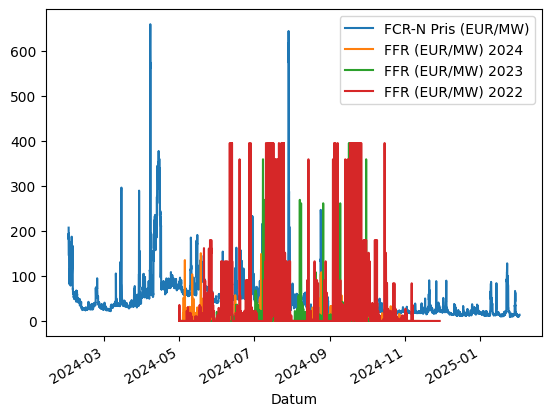

In [11]:
df_merged.plot(x='Datum')

C:\Users\carlv\AppData\Local\Temp\ipykernel_8852\751878038.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_notna.fillna(0).plot(kind='hist', alpha=0.5, bins=30)


<Axes: ylabel='Frequency'>

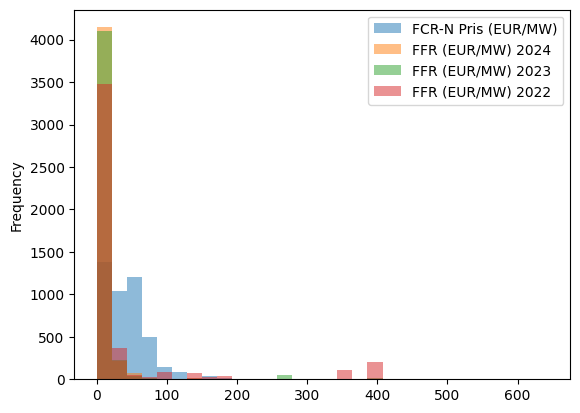

In [12]:
# make historgram with FFR prices
df_merged_notna = df_merged.dropna(subset=['FFR (EUR/MW) 2024', 'FFR (EUR/MW) 2023', 'FFR (EUR/MW) 2022'])
df_merged_notna.fillna(0).plot(kind='hist', alpha=0.5, bins=30)

C:\Users\carlv\AppData\Local\Temp\ipykernel_8852\3983047806.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_notna['FCR-N Pris (EUR/MW)'].fillna(0).plot(kind='hist', alpha=0.5, bins=30)


<Axes: ylabel='Frequency'>

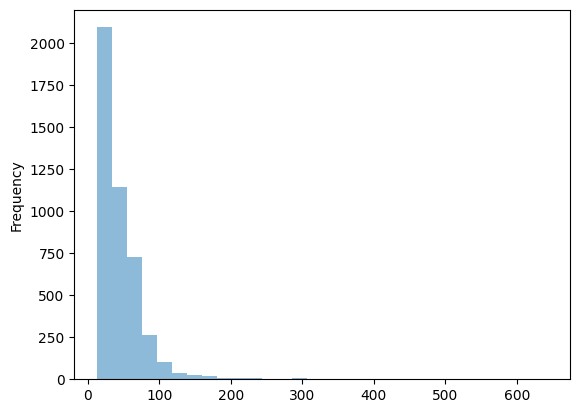

In [13]:
df_merged_notna['FCR-N Pris (EUR/MW)'].fillna(0).plot(kind='hist', alpha=0.5, bins=30)

<Axes: xlabel='Datum'>

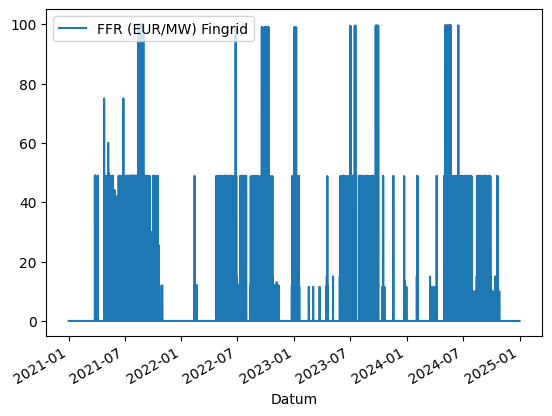

In [14]:
df_ffr_fingrid.plot(x='Datum', y='FFR (EUR/MW) Fingrid')

## mean values comparison

In [15]:
pd.options.display.float_format = '{:,.3f}'.format
print("Mean of Fingrid price EUR/MW:", df_ffr_fingrid['FFR (EUR/MW) Fingrid'].mean())
print("Mean of p>0 Fingrid price EUR/MW:", df_ffr_fingrid[df_ffr_fingrid['FFR (EUR/MW) Fingrid'] > 0]['FFR (EUR/MW) Fingrid'].mean())

Mean of Fingrid price EUR/MW: 5.187817228595891
Mean of p>0 Fingrid price EUR/MW: 33.2566988090011


In [16]:
df_merged.describe()

,Datum
count,8810
mean,2024-08-02 12:32:47.952326912
min,2024-02-01 00:00:00
25%,2024-05-02 19:15:00
50%,2024-08-02 13:30:00
75%,2024-11-02 04:45:00
max,2025-02-01 23:00:00


In [17]:
df_merged.fillna(0).describe()

C:\Users\carlv\AppData\Local\Temp\ipykernel_8852\858709426.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.fillna(0).describe()


,Datum,FCR-N Pris (EUR/MW),FFR (EUR/MW) 2024,FFR (EUR/MW) 2023,FFR (EUR/MW) 2022
count,8810,"8,810.000","8,810.000","8,810.000","8,810.000"
mean,2024-08-02 12:32:47.952326912,45.437,3.247,4.407,19.144
min,2024-02-01 00:00:00,8.640,0.000,0.000,0.000
25%,2024-05-02 19:15:00,19.660,0.000,0.000,0.000
50%,2024-08-02 13:30:00,30.880,0.000,0.000,0.000
75%,2024-11-02 04:45:00,54.932,0.000,0.000,0.000
max,2025-02-01 23:00:00,658.380,150.300,394.650,394.650
std,NaN,48.684,11.137,28.766,72.646


# FCR-D Upwards market analysis

In [18]:
df_fcrd = pd.read_csv("data/FCR-D_UP.csv", on_bad_lines='skip', sep=';')
df_fcrd.drop('endTime', inplace=True, axis=1)
df_fcrd.rename(columns={'startTime': 'Datum'}, inplace=True)
df_fcrd["Datum"] = pd.to_datetime(df_fcrd["Datum"], format='mixed')
df_fcrd.set_index('Datum', inplace=True)
cols = df_fcrd.columns.tolist()
cols = [c[len("Frequency Containment Reserve for Disturbances upwards regulation, "):] for c in cols]
df_fcrd.columns = cols
df_fcrd.head()

,received bids in the hourly market,nordic trade,reserve plans in the yearly market,procured volumes in the hourly market,hourly market prices
Datum,,,,,
2020-12-31 23:00:00+00:00,283.500,-163.300,365.700,94.900,3.000
2021-01-01 00:00:00+00:00,284.000,-164.800,366.700,95.400,3.000
2021-01-01 01:00:00+00:00,289.000,-164.700,366.600,95.400,3.000
2021-01-01 02:00:00+00:00,289.000,-165.600,367.500,95.400,3.000
2021-01-01 03:00:00+00:00,294.500,-172.600,369.000,100.900,3.000


array([[<Axes: xlabel='Datum'>, <Axes: xlabel='Datum'>,
        <Axes: xlabel='Datum'>],
       [<Axes: xlabel='Datum'>, <Axes: xlabel='Datum'>,
        <Axes: xlabel='Datum'>],
       [<Axes: xlabel='Datum'>, <Axes: xlabel='Datum'>,
        <Axes: xlabel='Datum'>]], dtype=object)

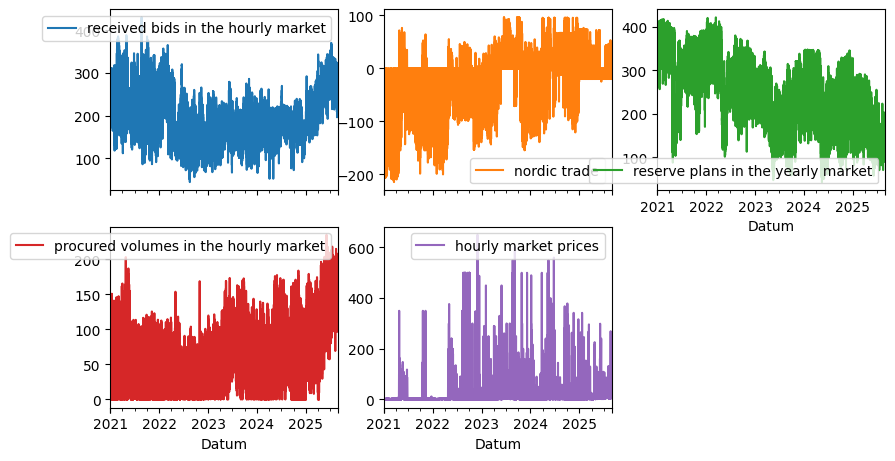

In [19]:
# plot
df_fcrd.plot(subplots=True, layout=(3,3), figsize=(10,8))

In [20]:
df_fcrd.describe()

,received bids in the hourly market,nordic trade,reserve plans in the yearly market,procured volumes in the hourly market,hourly market prices
count,"40,847.000","40,847.000","40,847.000","40,847.000","40,847.000"
mean,199.543,-29.372,250.291,64.345,15.798
std,56.538,56.664,77.798,41.789,43.321
min,43.900,-214.700,43.500,0.000,0.000
25%,158.000,-72.350,191.300,34.100,1.800
50%,191.200,0.000,255.500,60.300,2.840
75%,240.200,0.000,306.600,87.600,8.000
max,430.400,96.400,422.100,234.900,650.000


# Renewable Production in Fingrid

In [21]:
df = pd.read_csv('data/data_wind_solar_2024_25.csv', sep=';')
df.drop('endTime', inplace=True, axis=1)
df.rename(columns={'startTime': 'Datum'}, inplace=True)
df["Datum"] = pd.to_datetime(df["Datum"], format='mixed')
df.set_index('Datum', inplace=True)
df.columns = ['Wind', 'Solar']
df.head()

,Wind,Solar
Datum,,
2024-07-31 22:00:00+00:00,970.819,0.000
2024-07-31 22:15:00+00:00,968.006,0.000
2024-07-31 22:30:00+00:00,959.571,0.000
2024-07-31 22:45:00+00:00,902.011,0.000
2024-07-31 23:00:00+00:00,867.776,0.000


array([[<Axes: xlabel='Datum'>],
       [<Axes: xlabel='Datum'>]], dtype=object)

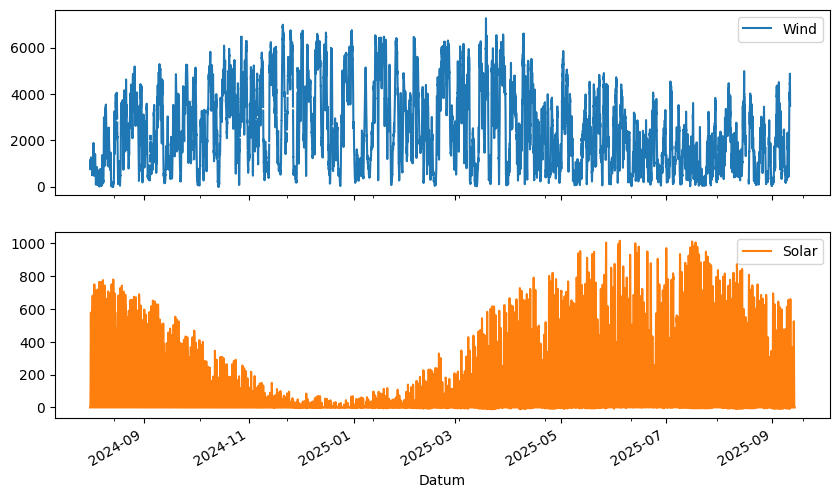

In [22]:
# plot
df.plot(subplots=True, layout=(2,1), figsize=(10,6))

In [23]:
import matplotlib.pyplot as plt

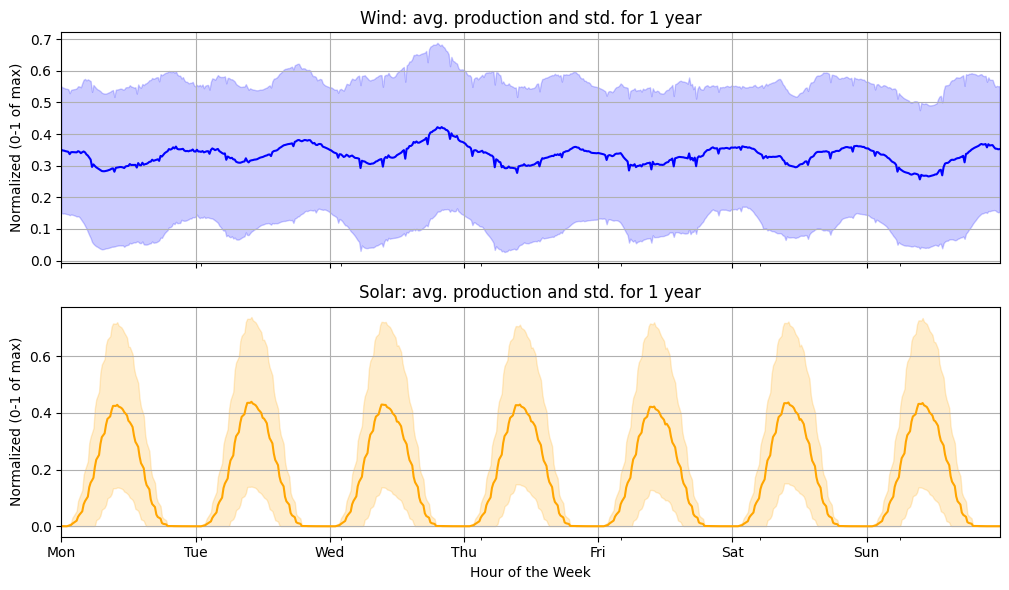

In [24]:
# create weekly profile by averaging for every time of the week and creating std
idxes = 24 * 7 * 4  # 15 min intervals
df_mean = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).mean()
df_std = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).std()
df_mean.index = pd.MultiIndex.from_tuples(df_mean.index, names=['Wochentag', 'Stunde', 'Minute'])
df_std.index = pd.MultiIndex.from_tuples(df_std.index, names=['Wochentag', 'Stunde', 'Minute'])

# normalize to max 1
max_vals = df.max()
df_mean = df_mean / max_vals
df_std = df_std / max_vals

df_mean_wind_solar = df_mean.copy() # save for later use

col1, col2 = df.columns

# plot mean with std as shaded area
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
df_mean[col1].plot(ax=ax[0], title='Wind: avg. production and std. for 1 year', color='b')
df_mean[col2].plot(ax=ax[1], title='Solar: avg. production and std. for 1 year', color='orange')
# add std as shaded area
ax[0].fill_between(np.arange(0, idxes), 
                   (df_mean[col1] - df_std[col1]).values.flatten(), 
                   (df_mean[col1] + df_std[col1]).values.flatten(), 
                   color='b', alpha=0.2)

lower = df_mean[col2] - df_std[col2]
lower[lower < 0] = 0
ax[1].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col2] + df_std[col2]).values.flatten(), 
                   color='orange', alpha=0.2)

plt.xlabel('Hour of the Week')
# xticks: day + hour
plt.xticks(ticks=np.arange(0, idxes, idxes/7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlim(0, idxes-1)
plt.tight_layout()
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel('Normalized (0-1 of max)')
ax[1].set_ylabel('Normalized (0-1 of max)')
plt.show()

In [25]:
df_mean

Wind  Solar
Wochentag Stunde Minute             
0         0      0      0.351  0.000
                 15     0.348  0.000
                 30     0.348  0.000
                 45     0.346  0.000
          1      0      0.345 -0.000
...                       ...    ...
6         22     45     0.359  0.000
          23     0      0.354  0.000
                 15     0.354  0.000
                 30     0.352  0.000
                 45     0.352  0.000

[672 rows x 2 columns]

# Plor FFR and FCR weekly values

In [26]:
# do same for procurement
df = pd.read_csv('data/data_ffr_fcr_procurement_2024_25.csv', sep=';')
df.drop('endTime', inplace=True, axis=1)
df.rename(columns={'startTime': 'Datum'}, inplace=True)
df["Datum"] = pd.to_datetime(df["Datum"], format='mixed')
df.set_index('Datum', inplace=True)
# df.columns = ['FFR ', 'Solar']
df.head()

,"Fast Frequency Reserve FFR, procured volume","Frequency Containment Reserve for Disturbances upwards regulation, procured volumes in the hourly market"
Datum,,
2024-07-31 22:00:00+00:00,0.000,100.700
2024-07-31 23:00:00+00:00,0.000,86.000
2024-08-01 00:00:00+00:00,0.000,66.400
2024-08-01 01:00:00+00:00,0.000,36.700
2024-08-01 02:00:00+00:00,0.000,39.500


array([[<Axes: xlabel='Datum'>],
       [<Axes: xlabel='Datum'>]], dtype=object)

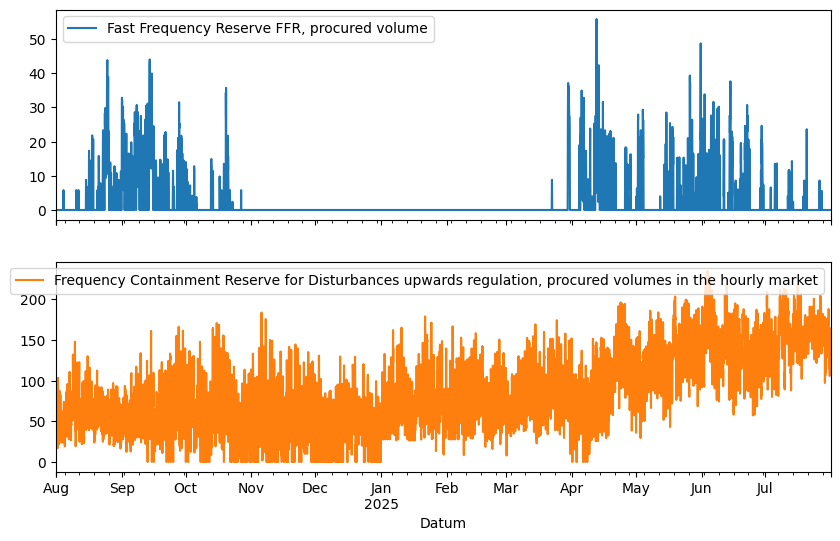

In [27]:
# plot
df.plot(subplots=True, layout=(2,1), figsize=(10,6))

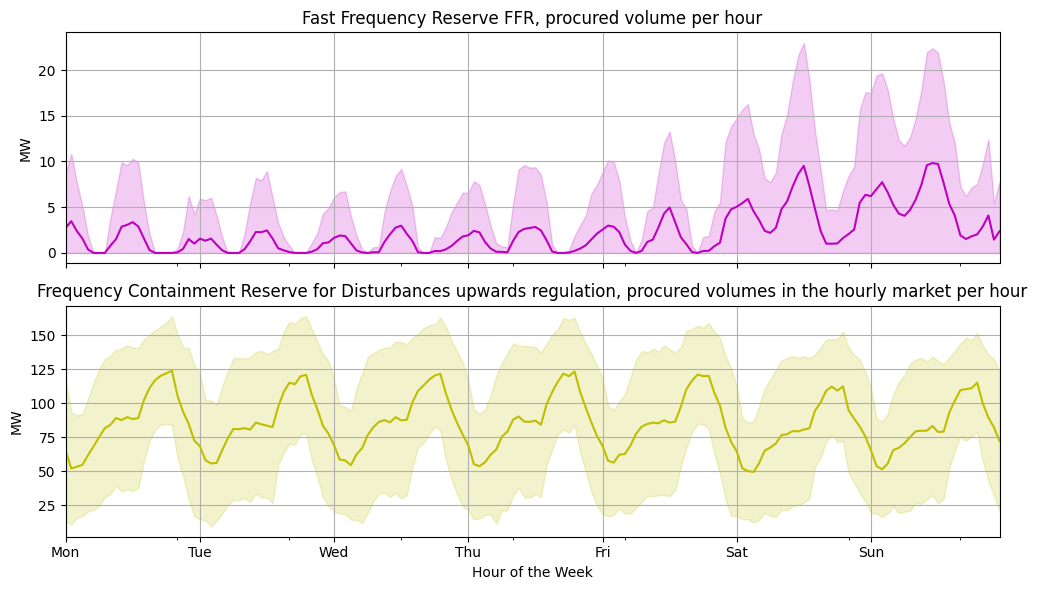

In [28]:
# create weekly profile by averaging for every time of the week and creating std
idxes = 24 * 7  # 15 min intervals
df_mean = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).mean()
df_std = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).std()
df_mean.index = pd.MultiIndex.from_tuples(df_mean.index, names=['Wochentag', 'Stunde', 'Minute'])
df_std.index = pd.MultiIndex.from_tuples(df_std.index, names=['Wochentag', 'Stunde', 'Minute'])

# # normalize to max 1
# max_vals = df.max()
# df_mean = df_mean / max_vals
# df_std = df_std / max_vals

# save for later
df_mean_ffr_fcrd = df_mean.copy()
df_std_ffr_fcrd = df_std.copy()

col1, col2 = df.columns

# plot mean with std as shaded area
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
df_mean[col1].plot(ax=ax[0], title=col1 + ' per hour', color='m')
df_mean[col2].plot(ax=ax[1], title=col2 + ' per hour', color='y')
# add std as shaded area
lower = df_mean[col1] - df_std[col1]
lower[lower < 0] = 0
ax[0].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col1] + df_std[col1]).values.flatten(), 
                   color='m', alpha=0.2)

lower = df_mean[col2] - df_std[col2]
lower[lower < 0] = 0
ax[1].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col2] + df_std[col2]).values.flatten(), 
                   color='y', alpha=0.2)

plt.xlabel('Hour of the Week')
# xticks: day + hour
plt.xticks(ticks=np.arange(0, idxes, idxes/7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlim(0, idxes-1)
plt.tight_layout()
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel('MW')
ax[1].set_ylabel('MW')
plt.show()

In [29]:
# construct probability distribution by weighting probability compared to other hours
# basically nor
df_prob = df_mean / df_mean.sum()
# next, split up every row into 4 values for 15 min intervals
df_prob_15min = pd.DataFrame(np.repeat(df_prob.values, 4, axis=0), columns=df_prob.columns)
df_prob_15min.index = pd.RangeIndex(start=0, stop=len(df_prob_15min), step=1)
df_prob_15min = df_prob_15min / df_prob_15min.sum()

In [30]:
# save to df
df_prob_15min.to_csv('data/procurement_probability_distribution_15min.csv', sep=';')

In [31]:
# do same for prices
df = pd.read_csv('data/data_ffr_fcr_d_price_2024_25.csv', sep=';')
df.drop('endTime', inplace=True, axis=1)
df.rename(columns={'startTime': 'Datum'}, inplace=True)
df["Datum"] = pd.to_datetime(df["Datum"], format='mixed')
df.set_index('Datum', inplace=True)
# df.columns = ['FFR ', 'Solar']
df.rename(columns={'Frequency Containment Reserve for Disturbances upwards regulation, hourly market prices': 'FCR-D Up Price (EUR/MW)'}, inplace=True)
df.head()

,"Fast Frequency Reserve FFR, price",FCR-D Up Price (EUR/MW)
Datum,,
2024-07-31 22:00:00+00:00,0.000,29.700
2024-07-31 23:00:00+00:00,0.000,10.000
2024-08-01 00:00:00+00:00,0.000,8.000
2024-08-01 01:00:00+00:00,0.000,1.640
2024-08-01 02:00:00+00:00,0.000,1.900


array([[<Axes: xlabel='Datum'>],
       [<Axes: xlabel='Datum'>]], dtype=object)

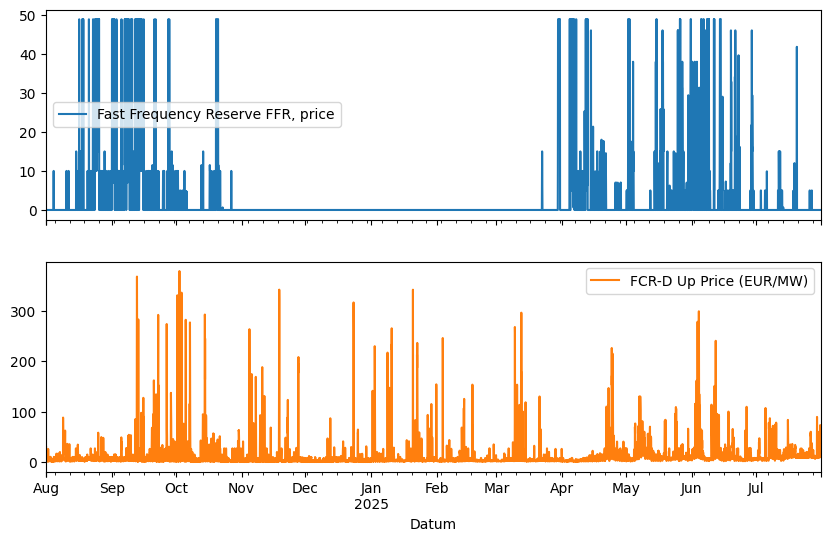

In [32]:
# plot
df.plot(subplots=True, layout=(2,1), figsize=(10,6))

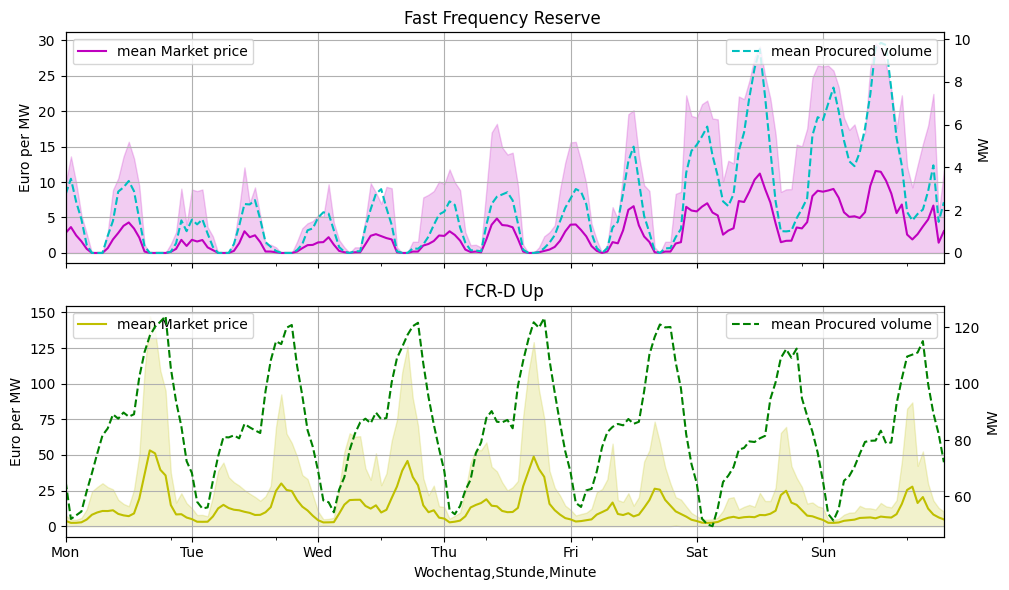

In [33]:
# create weekly profile by averaging for every time of the week and creating std
idxes = 24 * 7  # 15 min intervals
df_mean = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).mean()
df_std = df.groupby([df.index.dayofweek, df.index.hour, df.index.minute]).std()
df_mean.index = pd.MultiIndex.from_tuples(df_mean.index, names=['Wochentag', 'Stunde', 'Minute'])
df_std.index = pd.MultiIndex.from_tuples(df_std.index, names=['Wochentag', 'Stunde', 'Minute'])

# # normalize to max 1
# max_vals = df.max()
# df_mean = df_mean / max_vals
# df_std = df_std / max_vals

col1, col2 = df.columns

# plot mean with std as shaded area
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
df_mean[col1].plot(ax=ax[0], title=col1[:-10], color='m', label='mean Market price')
df_mean[col2].plot(ax=ax[1], title=col2[:-15], color='y', label='mean Market price')

# add procured volume
col1p, col2p = df_mean_ffr_fcrd.columns
ax0_twin, ax1_twin = ax[0].twinx(), ax[1].twinx()
df_mean_ffr_fcrd[col1p].plot(ax=ax0_twin, color='c', linestyle='--', label='mean Procured volume')
df_mean_ffr_fcrd[col2p].plot(ax=ax1_twin, color='g', linestyle='--', label='mean Procured volume')
ax0_twin.set_ylabel('MW')
ax1_twin.set_ylabel('MW')
ax0_twin.legend(loc='upper right')
ax1_twin.legend(loc='upper right')

# add std as shaded area
lower = df_mean[col1] - df_std[col1]
lower[lower < 0] = 0
ax[0].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col1] + df_std[col1]).values.flatten(), 
                   color='m', alpha=0.2)

lower = df_mean[col2] - df_std[col2]
lower[lower < 0] = 0
ax[1].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col2] + df_std[col2]).values.flatten(), 
                   color='y', alpha=0.2)

plt.xlabel('Hour of the Week')
# xticks: day + hour
plt.xticks(ticks=np.arange(0, idxes, idxes/7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlim(0, idxes-1)
plt.tight_layout()
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel('Euro per MW')
ax[1].set_ylabel('Euro per MW')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

In [34]:
df_price_15min = pd.DataFrame(np.repeat(df_mean.values, 4, axis=0), columns=df_mean.columns)
df_price_15min.index = pd.RangeIndex(start=0, stop=len(df_price_15min), step=1)
df_price_15min

,"Fast Frequency Reserve FFR, price",FCR-D Up Price (EUR/MW)
0,2.820,3.770
1,2.820,3.770
2,2.820,3.770
3,2.820,3.770
4,3.648,2.348
...,...,...
667,1.442,6.183
668,3.079,4.759
669,3.079,4.759
670,3.079,4.759


# Spot Market prices

In [35]:
df_2024, df_2025 = pd.read_csv('data/spot_2024.csv', sep=','), pd.read_csv('data/spot_2025.csv', sep=',')
df_2024['Datum'] = pd.to_datetime([x.split('-')[0] for x in df_2024['MTU (UTC)']], format='%d/%m/%Y %H:%M:%S ')
df_2025['Datum'] = pd.to_datetime([x.split('-')[0] for x in df_2025['MTU (UTC)']], format='%d/%m/%Y %H:%M:%S ')
# create dataframe for august 2024 to august 2025 to match other data
df_24_25 = df_2024[['Datum', 'Day-ahead Price (EUR/MWh)']]
df_24_25 = pd.concat([df_24_25, df_2025[['Datum', 'Day-ahead Price (EUR/MWh)']]], ignore_index=True)
# set start and end date
start, end = pd.to_datetime('2024-08-01'), pd.to_datetime('2025-08-01')
df_24_25 = df_24_25[(df_24_25['Datum'] >= start) & (df_24_25['Datum'] < end)]
df_24_25.set_index('Datum', inplace=True)
df_24_25.index = df_24_25.index.tz_localize('UTC', ambiguous='infer')
df_24_25

,Day-ahead Price (EUR/MWh)
Datum,
2024-08-01 00:00:00+00:00,-0.010
2024-08-01 01:00:00+00:00,-0.010
2024-08-01 02:00:00+00:00,0.000
2024-08-01 03:00:00+00:00,2.340
2024-08-01 04:00:00+00:00,23.060
...,...
2025-07-31 19:00:00+00:00,29.760
2025-07-31 20:00:00+00:00,15.840
2025-07-31 21:00:00+00:00,14.000


In [36]:
# add df_fcrd prices
df_fcrd.rename(columns={'hourly market prices': 'FCR-D Upwards Hourly Market Price'}, inplace=True)
df_24_25 = pd.merge(df_24_25, df_fcrd['FCR-D Upwards Hourly Market Price'], left_index=True, right_index=True, how='left')
df_24_25

,Day-ahead Price (EUR/MWh),FCR-D Upwards Hourly Market Price
Datum,,
2024-08-01 00:00:00+00:00,-0.010,8.000
2024-08-01 01:00:00+00:00,-0.010,1.640
2024-08-01 02:00:00+00:00,0.000,1.900
2024-08-01 03:00:00+00:00,2.340,1.000
2024-08-01 04:00:00+00:00,23.060,3.200
...,...,...
2025-07-31 19:00:00+00:00,29.760,64.000
2025-07-31 20:00:00+00:00,15.840,11.160
2025-07-31 21:00:00+00:00,14.000,9.860


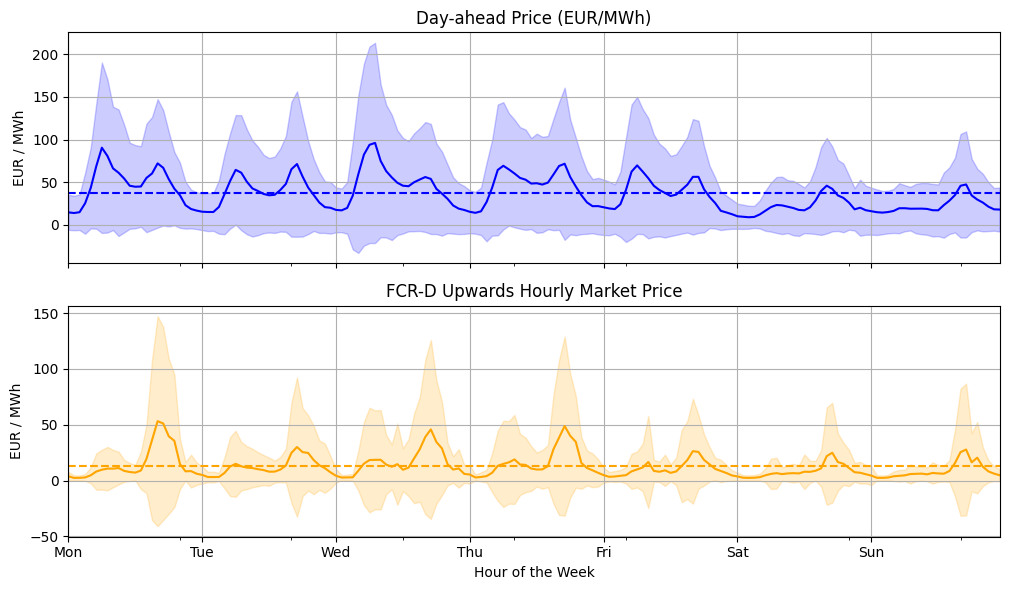

In [37]:
# create weekly profile by averaging for every time of the week and creating std
idxes = 24 * 7  # 1h intervals
df = df_24_25.copy()
df_mean = df.groupby([df.index.dayofweek, df.index.hour]).mean()
df_std = df.groupby([df.index.dayofweek, df.index.hour]).std()
df_mean.index = pd.MultiIndex.from_tuples(df_mean.index, names=['Wochentag', 'Stunde'])
df_std.index = pd.MultiIndex.from_tuples(df_std.index, names=['Wochentag', 'Stunde'])

df_mean_day_ahead = df_mean.copy() # save for later use

col1, col2 = df.columns

# plot mean with std as shaded area
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
df_mean[col1].plot(ax=ax[0], title=col1, color='b')
df_mean[col2].plot(ax=ax[1], title=col2, color='orange')
# plot horizontal line at mean
ax[0].axhline(y=df_mean[col1].mean(), color='b', linestyle='--')
ax[1].axhline(y=df_mean[col2].mean(), color='orange', linestyle='--')
# add std as shaded area
ax[0].fill_between(np.arange(0, idxes), 
                   (df_mean[col1] - df_std[col1]).values.flatten(), 
                   (df_mean[col1] + df_std[col1]).values.flatten(), 
                   color='b', alpha=0.2)

lower = df_mean[col2] - df_std[col2]
# lower[lower < 0] = 0
ax[1].fill_between(np.arange(0, idxes), 
                   lower.values.flatten(), 
                   (df_mean[col2] + df_std[col2]).values.flatten(), 
                   color='orange', alpha=0.2)

plt.xlabel('Hour of the Week')
# xticks: day + hour
plt.xticks(ticks=np.arange(0, idxes, idxes/7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlim(0, idxes-1)
plt.tight_layout()
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel('EUR / MWh')
ax[1].set_ylabel('EUR / MWh')
plt.show()

# DVPP spot market optimal 

In [38]:
from scipy.optimize import linprog

In [39]:
def optimize_vpp_profit(df_mean, df_mean_ws, battery_power_mw=1.0, battery_capacity_mwh=2.0):
    """
    Optimize the profit of a PV-Wind-BESS virtual power plant
    
    Parameters:
    - df_mean: DataFrame with 'Day-ahead Price (EUR/MWh)' (hourly)
    - df_mean_ws: DataFrame with 'Wind' and 'Solar' columns (15-minute resolution)
    - battery_power_mw: Battery power rating in MW (default 1.0)
    - battery_capacity_mwh: Battery energy capacity in MWh (default 2.0)
    
    Returns:
    - Dictionary with optimization results and profit breakdown
    """
    
    # Convert hourly prices to 15-minute resolution (repeat each price 4 times)
    prices_15min = np.repeat(df_mean['Day-ahead Price (EUR/MWh)'].values, 4)
    
    # Ensure we have matching lengths
    n_periods = min(len(prices_15min), len(df_mean_ws))
    prices = prices_15min[:n_periods]
    wind_gen = df_mean_ws['Wind'].values[:n_periods]
    solar_gen = df_mean_ws['Solar'].values[:n_periods]
    
    # Total renewable generation at each time step
    renewable_gen = wind_gen + solar_gen
    
    # Time step in hours (15 minutes = 0.25 hours)
    dt = 0.25
    
    # Decision variables:
    # x[0:n] = battery charge power (MW) at each time step
    # x[n:2n] = battery discharge power (MW) at each time step  
    # x[2n:3n] = grid purchase power (MW) at each time step
    # x[3n:4n] = grid sale power (MW) at each time step
    n = n_periods
    
    # Objective: maximize profit = revenue from sales - cost of purchases
    # We minimize the negative of profit
    c = np.zeros(4 * n)
    c[2*n:3*n] = prices  # cost of grid purchases (positive cost)
    c[3*n:4*n] = -prices  # revenue from grid sales (negative cost = profit)
    
    # Inequality constraints (Ax <= b)
    A_ub = []
    b_ub = []
    
    # Battery power constraints
    # Charge power <= battery_power_mw
    A_charge = np.zeros((n, 4*n))
    A_charge[:, :n] = np.eye(n)
    A_ub.append(A_charge)
    b_ub.extend([battery_power_mw] * n)
    
    # Discharge power <= battery_power_mw  
    A_discharge = np.zeros((n, 4*n))
    A_discharge[:, n:2*n] = np.eye(n)
    A_ub.append(A_discharge)
    b_ub.extend([battery_power_mw] * n)
    
    # Battery energy constraints (0 <= SOC <= battery_capacity_mwh)
    # SOC[t] = SOC[t-1] + (charge[t] - discharge[t]) * dt
    # SOC[t] <= battery_capacity_mwh
    A_energy_max = np.zeros((n, 4*n))
    for t in range(n):
        # Cumulative sum of (charge - discharge) * dt up to time t
        A_energy_max[t, :t+1] = dt  # charge terms
        A_energy_max[t, n:n+t+1] = -dt  # discharge terms
    A_ub.append(A_energy_max)
    b_ub.extend([battery_capacity_mwh] * n)
    
    # SOC[t] >= 0 (battery cannot discharge below empty)
    A_energy_min = np.zeros((n, 4*n))
    for t in range(n):
        A_energy_min[t, :t+1] = -dt  # -charge terms
        A_energy_min[t, n:n+t+1] = dt  # discharge terms  
    A_ub.append(A_energy_min)
    b_ub.extend([0] * n)
    
    # Non-negativity constraints for grid purchase and sale
    # Grid purchase >= 0, Grid sale >= 0 (handled by bounds)
    
    # Equality constraints (Ax = b): Power balance
    # renewable_gen[t] + grid_purchase[t] + discharge[t] = grid_sale[t] + charge[t]
    A_eq = np.zeros((n, 4*n))
    b_eq = renewable_gen.copy()
    
    for t in range(n):
        A_eq[t, t] = 1          # charge[t]
        A_eq[t, n+t] = -1       # discharge[t]
        A_eq[t, 2*n+t] = -1     # grid_purchase[t]
        A_eq[t, 3*n+t] = 1      # grid_sale[t]
    
    # Variable bounds: all variables >= 0
    bounds = [(0, None)] * (4 * n)
    
    # Convert lists to arrays
    A_ub = np.vstack(A_ub)
    b_ub = np.array(b_ub)
    
    print(f"Optimizing for {n} time periods (15-minute intervals)")
    print(f"Total renewable generation: {renewable_gen.sum():.2f} MWh")
    print(f"Average price: {prices.mean():.2f} EUR/MWh")
    
    # Solve optimization
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, 
                    bounds=bounds, method='highs')
    
    if not result.success:
        print(f"Optimization failed: {result.message}")
        return None
    
    # Extract results
    x = result.x
    charge = x[:n]
    discharge = x[n:2*n]
    grid_purchase = x[2*n:3*n]
    grid_sale = x[3*n:4*n]
    
    # Calculate battery SOC
    soc = np.zeros(n)
    for t in range(n):
        if t == 0:
            soc[t] = (charge[t] - discharge[t]) * dt
        else:
            soc[t] = soc[t-1] + (charge[t] - discharge[t]) * dt
    
    # Calculate profit components
    revenue = np.sum(grid_sale * prices * dt)  # dt converts MW to MWh
    cost = np.sum(grid_purchase * prices * dt)
    total_profit = revenue - cost
    
    # Calculate profit for each time step
    revenue_per_step = grid_sale * prices * dt
    cost_per_step = grid_purchase * prices * dt
    profit_per_step = revenue_per_step - cost_per_step
    
    # Calculate profit attribution by technology
    # Wind profit: wind generation sold at market price
    wind_profit = wind_gen * prices * dt
    # Solar profit: solar generation sold at market price  
    solar_profit = solar_gen * prices * dt
    # Battery profit: discharge revenue minus charge cost (when charging from grid)
    battery_discharge_revenue = discharge * prices * dt
    # Battery charging cost (only when charging from grid, not from excess renewables)
    # We need to determine how much battery charging comes from grid vs renewables
    
    # Calculate battery profit more precisely
    # Battery profit = revenue from discharge - cost of energy stored
    # The cost of stored energy depends on when it was charged:
    # - If charged from excess renewables: opportunity cost = market price
    # - If charged from grid: actual cost = market price
    
    # For simplicity, we'll use discharge revenue minus opportunity cost of storage
    battery_charge_cost = charge * prices * dt  # Opportunity cost
    battery_profit = battery_discharge_revenue - battery_charge_cost
    
    # Create results dataframe (keep simple integer index to avoid datetime issues)
    results_df = pd.DataFrame({
        'Price (EUR/MWh)': prices,
        'Wind (MW)': wind_gen,
        'Solar (MW)': solar_gen,
        'Total_Renewable (MW)': renewable_gen,
        'Battery_Charge (MW)': charge,
        'Battery_Discharge (MW)': discharge,
        'Battery_SOC (MWh)': soc,
        'Grid_Purchase (MW)': grid_purchase,
        'Grid_Sale (MW)': grid_sale,
        'Net_Grid (MW)': grid_sale - grid_purchase,
        'Revenue (EUR)': revenue_per_step,
        'Cost (EUR)': cost_per_step,
        'Profit (EUR)': profit_per_step,
        'Wind_Profit (EUR)': wind_profit,
        'Solar_Profit (EUR)': solar_profit,
        'Battery_Profit (EUR)': battery_profit
    })
    
    # Create hourly aggregated results
    intervals_per_hour = 4  # 15-min intervals per hour
    n_hours = len(results_df) // intervals_per_hour
    
    hourly_results = []
    for hour in range(n_hours):
        start_idx = hour * intervals_per_hour
        end_idx = min(start_idx + intervals_per_hour, len(results_df))
        hour_data = results_df.iloc[start_idx:end_idx]
        
        hourly_row = {
            'Hour': hour,
            'Avg_Price (EUR/MWh)': hour_data['Price (EUR/MWh)'].mean(),
            'Wind_Energy (MWh)': hour_data['Wind (MW)'].sum() * dt,
            'Solar_Energy (MWh)': hour_data['Solar (MW)'].sum() * dt,
            'Battery_Charge_Energy (MWh)': hour_data['Battery_Charge (MW)'].sum() * dt,
            'Battery_Discharge_Energy (MWh)': hour_data['Battery_Discharge (MW)'].sum() * dt,
            'Grid_Purchase_Energy (MWh)': hour_data['Grid_Purchase (MW)'].sum() * dt,
            'Grid_Sale_Energy (MWh)': hour_data['Grid_Sale (MW)'].sum() * dt,
            'Total_Profit (EUR)': hour_data['Profit (EUR)'].sum(),
            'Wind_Profit (EUR)': hour_data['Wind_Profit (EUR)'].sum(),
            'Solar_Profit (EUR)': hour_data['Solar_Profit (EUR)'].sum(),
            'Battery_Profit (EUR)': hour_data['Battery_Profit (EUR)'].sum()
        }
        hourly_results.append(hourly_row)
    
    hourly_df = pd.DataFrame(hourly_results)
    
    # Summary statistics
    total_renewable_energy = np.sum(renewable_gen * dt)
    total_sold_energy = np.sum(grid_sale * dt)
    total_purchased_energy = np.sum(grid_purchase * dt)
    battery_cycles = np.sum(charge * dt) / battery_capacity_mwh
    
    summary = {
        'total_profit_eur': total_profit,
        'revenue_eur': revenue,
        'cost_eur': cost,
        'total_renewable_energy_mwh': total_renewable_energy,
        'total_sold_energy_mwh': total_sold_energy,
        'total_purchased_energy_mwh': total_purchased_energy,
        'battery_cycles': battery_cycles,
        'capacity_factor_battery': np.mean(np.abs(charge - discharge)) / battery_power_mw,
        'results_df': results_df
    }
    
    return summary

In [40]:
def plot_results(summary):
    """Plot the optimization results"""
    df = summary['results_df']
    
    fig, axes = plt.subplots(5, 1, figsize=(15, 15))
    
    # Helper function to format x-axis with day names
    def format_day_axis(ax):
        # Check if index is datetime
        if hasattr(df.index, 'date'):
            # Get unique days and their positions
            days = df.index.date
            unique_days = pd.Series(days).drop_duplicates()
            day_positions = []
            day_labels = []
            
            day_names = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
            
            for i, day in enumerate(unique_days):
                day_mask = days == day
                day_positions.append(df.index[day_mask][len(df.index[day_mask])//2])  # Middle of day
                weekday = pd.Timestamp(day).weekday()
                day_labels.append(day_names[weekday])
            
            ax.set_xticks(day_positions)
            ax.set_xticklabels(day_labels)
        else:
            # For non-datetime index, create day labels based on 15-min intervals
            # Assuming 96 intervals per day (24 hours * 4 intervals per hour)
            n_points = len(df)
            intervals_per_day = 96  # 15-min intervals per day
            
            day_names = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
            day_positions = []
            day_labels = []
            
            # Calculate how many complete days we have
            n_days = min(7, (n_points // intervals_per_day) + 1)
            
            for day in range(n_days):
                start_idx = day * intervals_per_day
                if start_idx < n_points:
                    day_positions.append(start_idx)
                    day_labels.append(day_names[day % 7])
            
            ax.set_xticks(day_positions)
            ax.set_xticklabels(day_labels)
        
        ax.grid(True, alpha=0.3)
    
    # Plot 1: Prices and Generation
    ax1 = axes[0]
    ax1.plot(df.index, df['Price (EUR/MWh)'], 'k-', label='Price', linewidth=2)
    ax1.set_ylabel('Price (EUR/MWh)', color='k')
    ax1.tick_params(axis='y', labelcolor='k')
    
    ax1_twin = ax1.twinx()
    ax1_twin.plot(df.index, df['Wind (MW)'], 'b-', label='Wind', alpha=0.7)
    ax1_twin.plot(df.index, df['Solar (MW)'], 'orange', label='Solar', alpha=0.7)
    ax1_twin.plot(df.index, df['Total_Renewable (MW)'], 'g-', label='Total Renewable', linewidth=2)
    ax1_twin.set_ylabel('Power (MW)', color='g')
    ax1_twin.tick_params(axis='y', labelcolor='g')
    ax1_twin.legend(loc='upper right')
    
    ax1.set_title('Electricity Prices and Renewable Generation')
    format_day_axis(ax1)
    
    # Plot 2: Battery Operations
    ax2 = axes[1]
    ax2.plot(df.index, df['Battery_Charge (MW)'], 'r-', label='Charge', linewidth=2)
    ax2.plot(df.index, -df['Battery_Discharge (MW)'], 'b-', label='Discharge (negative)', linewidth=2)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.set_ylabel('Battery Power (MW)')
    ax2.set_title('Battery Charge/Discharge')
    ax2.legend()
    format_day_axis(ax2)
    
    # Plot 3: Battery SOC
    ax3 = axes[2]
    ax3.plot(df.index, df['Battery_SOC (MWh)'], 'purple', linewidth=2)
    ax3.set_ylabel('SOC (MWh)')
    ax3.set_title('Battery State of Charge')
    ax3.set_ylim(0, None)
    format_day_axis(ax3)
    
    # Plot 4: Grid Operations
    ax4 = axes[3]
    ax4.plot(df.index, df['Grid_Sale (MW)'], 'g-', label='Sale to Grid', linewidth=2)
    ax4.plot(df.index, -df['Grid_Purchase (MW)'], 'r-', label='Purchase from Grid (negative)', linewidth=2)
    ax4.plot(df.index, df['Net_Grid (MW)'], 'k--', label='Net to Grid', alpha=0.7)
    ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax4.set_ylabel('Grid Power (MW)')
    ax4.set_title('Grid Interactions')
    ax4.legend()
    format_day_axis(ax4)
    
    # Plot 5: Profit per Time Step (NEW)
    ax5 = axes[4]
    # Color bars based on profit/loss
    colors = ['g' if p >= 0 else 'r' for p in df['Profit (EUR)']]
    bars = ax5.bar(df.index, df['Profit (EUR)'], color=colors, alpha=0.7, width=0.8)
    ax5.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
    ax5.set_ylabel('Profit (EUR)')
    ax5.set_xlabel('Day of Week')
    ax5.set_title('Profit per Time Step (15-min intervals)')
    
    # Add legend for profit colors
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='g', alpha=0.7, label='Profit'),
                      Patch(facecolor='r', alpha=0.7, label='Loss')]
    ax5.legend(handles=legend_elements, loc='upper right')
    
    format_day_axis(ax5)
    
    plt.tight_layout()
    plt.show()

Optimizing for 672 time periods (15-minute intervals)
Total renewable generation: 326.05 MWh
Average price: 37.32 EUR/MWh

VPP OPTIMIZATION RESULTS
Total Profit: 3709.29 EUR
Revenue from Sales: 4687.43 EUR
Cost of Purchases: 978.15 EUR
Total Renewable Energy: 81.51 MWh
Total Energy Sold: 113.03 MWh
Total Energy Purchased: 31.51 MWh
Battery Equivalent Cycles: 61.25
Battery Capacity Factor: 72.9%


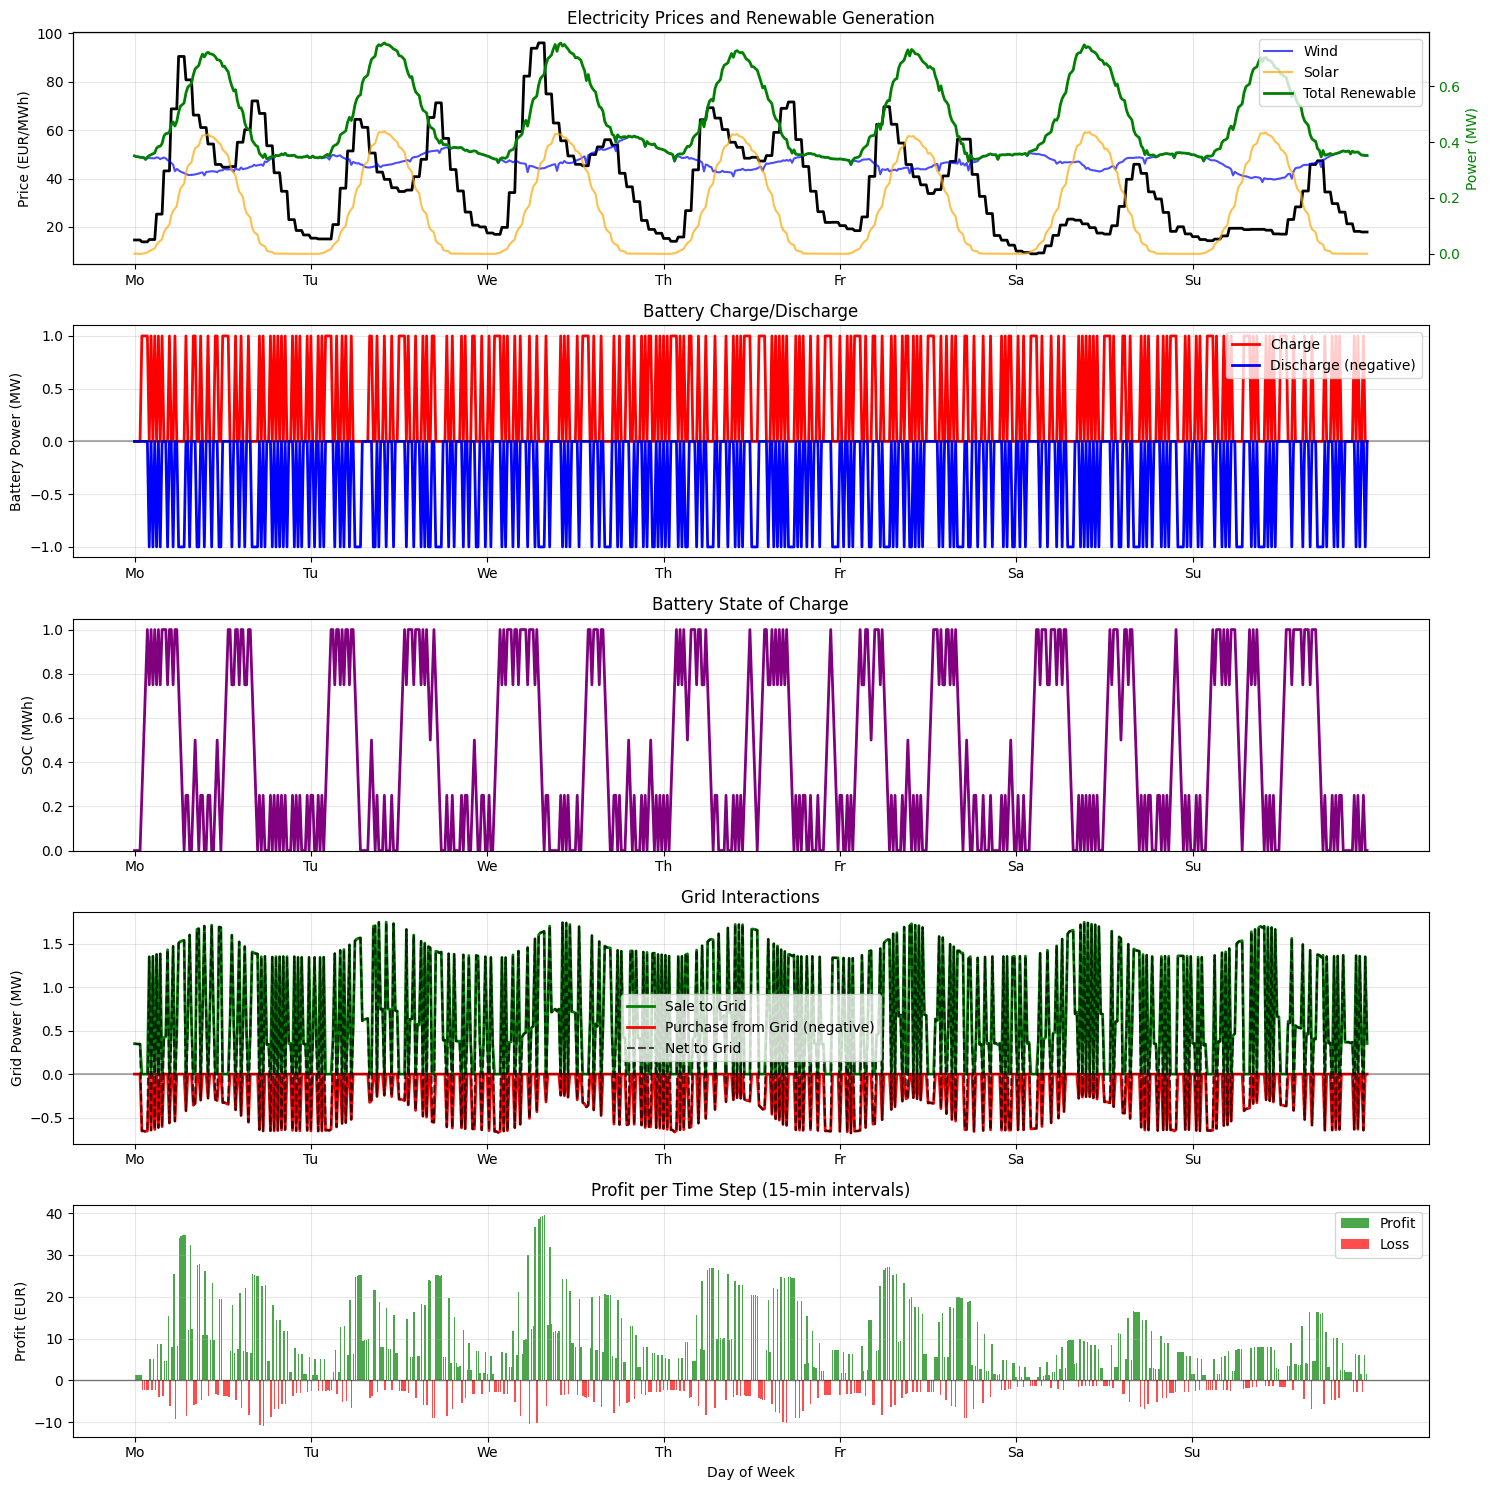

In [41]:
# Example usage:
"""
Run the VPP optimization with your data

Usage:
results = run_optimization(df_mean, df_mean_ws)
"""

# Run optimization
results = optimize_vpp_profit(df_mean_day_ahead, df_mean_wind_solar, battery_power_mw=1.0, battery_capacity_mwh=1.0)

# Print summary
print("\n" + "="*50)
print("VPP OPTIMIZATION RESULTS")
print("="*50)
print(f"Total Profit: {results['total_profit_eur']:.2f} EUR")
print(f"Revenue from Sales: {results['revenue_eur']:.2f} EUR")
print(f"Cost of Purchases: {results['cost_eur']:.2f} EUR")
print(f"Total Renewable Energy: {results['total_renewable_energy_mwh']:.2f} MWh")
print(f"Total Energy Sold: {results['total_sold_energy_mwh']:.2f} MWh")
print(f"Total Energy Purchased: {results['total_purchased_energy_mwh']:.2f} MWh")
print(f"Battery Equivalent Cycles: {results['battery_cycles']:.2f}")
print(f"Battery Capacity Factor: {results['capacity_factor_battery']:.1%}")

# Generate plots
plot_results(results)

Wind_Profit (EUR): Total = 8219.14 EUR, Mean per hour = 12.29 EUR, Std Dev = 6.14 EUR
Solar_Profit (EUR): Total = 4544.07 EUR, Mean per hour = 6.79 EUR, Std Dev = 7.92 EUR
Battery_Profit (EUR): Total = 2052.32 EUR, Mean per hour = 3.07 EUR, Std Dev = 16.03 EUR


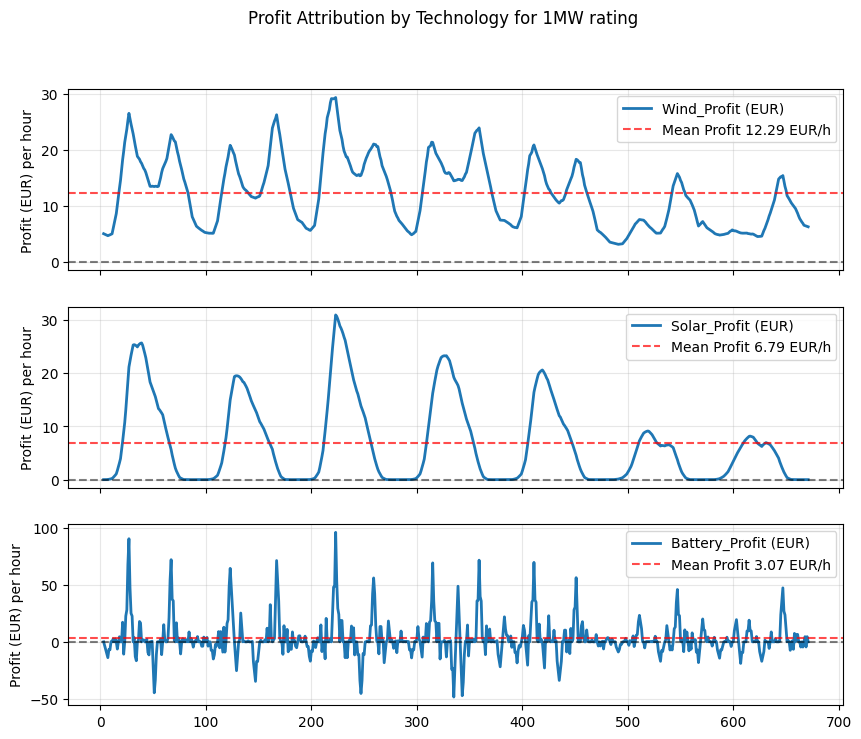

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

fig.suptitle('Profit Attribution by Technology for 1MW rating')
names = ['Wind_Profit (EUR)', 'Solar_Profit (EUR)', 'Battery_Profit (EUR)']
sigmas = []

# axs[0].plot(results['results_df']['Wind_Profit (EUR)'], label='Wind Profit', linewidth=2)
# axs[1].plot(results['results_df']['Solar_Profit (EUR)'], label='Solar Profit', linewidth=2)
# axs[2].plot(results['results_df']['Battery_Profit (EUR)'], label='Battery Profit', linewidth=2)
for name, ax in zip(names, axs):
    # sum 4 datapoints to get hourly values
    hourly_profit = results['results_df'][name].rolling(window=4).sum()
    ax.plot(hourly_profit, label=name, linewidth=2)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    mean_profit = hourly_profit.mean()
    sigma_profit = hourly_profit.std()
    sigmas.append(sigma_profit)
    print(f"{name}: Total = {hourly_profit.sum():.2f} EUR, Mean per hour = {mean_profit:.2f} EUR, Std Dev = {sigma_profit:.2f} EUR")
    ax.axhline(y=mean_profit, color='r', linestyle='--', alpha=0.7, label=f'Mean Profit {mean_profit:.2f} EUR/h')


    ax.set_ylabel('Profit (EUR) per hour')
    ax.legend()
    ax.grid(True, alpha=0.3)
    # draw horizontal line at mean
# plot mean of columns